In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt

# Test the CBETA DC Gun Template
---
## Initial Particles

In [2]:
from distgen import Generator

In [3]:
gen = Generator("cbeta_dcgun_distgen.yaml")
gen["n_particle"] = 100
gen.run()

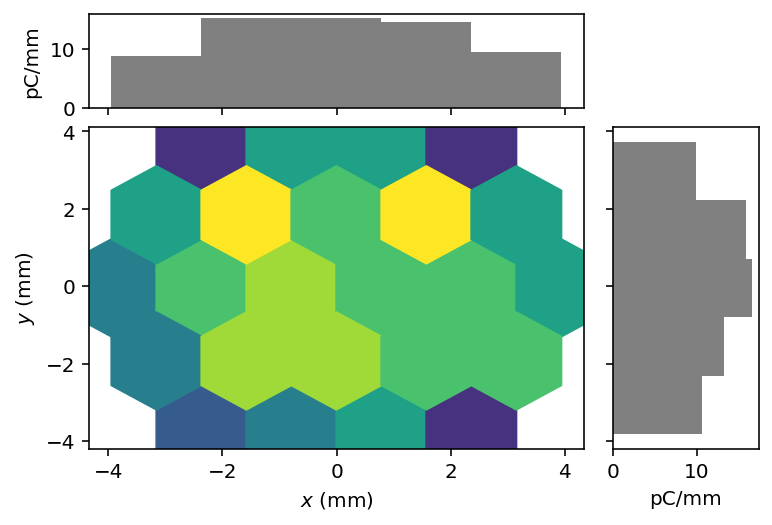

In [4]:
gen.particles.plot("x", "y")

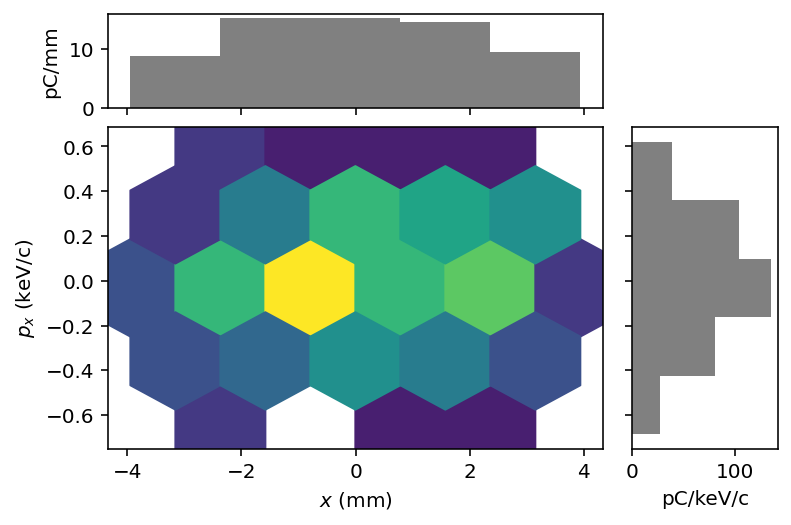

In [5]:
gen.particles.plot("x", "px")

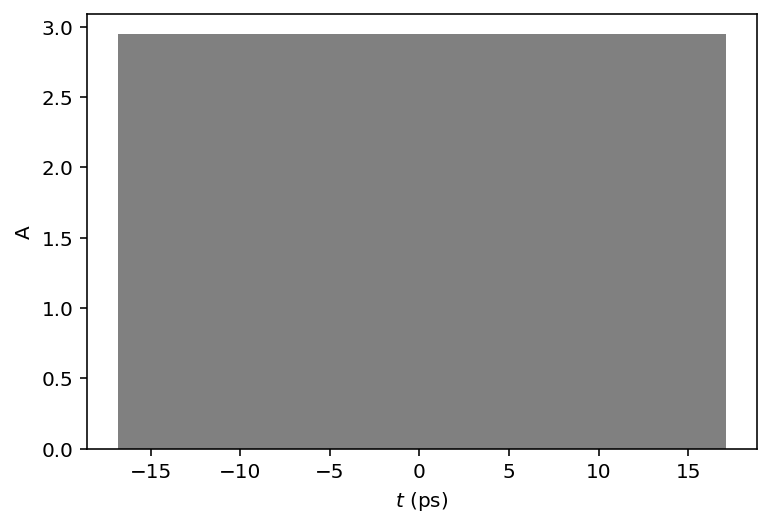

In [6]:
gen.particles.plot("t")

## Run GPT w/distgen input particles directly

In [7]:
from gpt import GPT

In [8]:
G = GPT("cbeta_dcgun_gpt.in", initial_particles=gen.particles)

In [9]:
print(G)


GPT object:
   Original input file: cbeta_dcgun_gpt.in
   Template location: /Users/colwyngulliford/Documents/GitHub/xopt/examples/lume/templates/cbeta_dcgun
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp2pvy52mt
   Timeout: None (sec)

Results
   Finished: False
   Error occured: False


In [10]:
G.run()

In [11]:
print(G)


GPT object:
   Original input file: cbeta_dcgun_gpt.in
   Template location: /Users/colwyngulliford/Documents/GitHub/xopt/examples/lume/templates/cbeta_dcgun
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp2pvy52mt
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.5212299823760986 (sec)


## Run w/distgen driver

In [12]:
from gpt import run_gpt_with_distgen

In [13]:
G = run_gpt_with_distgen(
    gpt_input_file="cbeta_dcgun_gpt.in",
    distgen_input_file="cbeta_dcgun_distgen.yaml",
    settings={"Ntout": 500, "n_particle": 100},
)

In [14]:
print(G)


GPT object:
   Original input file: cbeta_dcgun_gpt.in
   Template location: /Users/colwyngulliford/Documents/GitHub/xopt/examples/lume/templates/cbeta_dcgun
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpo1f1nbph
   Timeout: 2500 (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.8935811519622803 (sec)


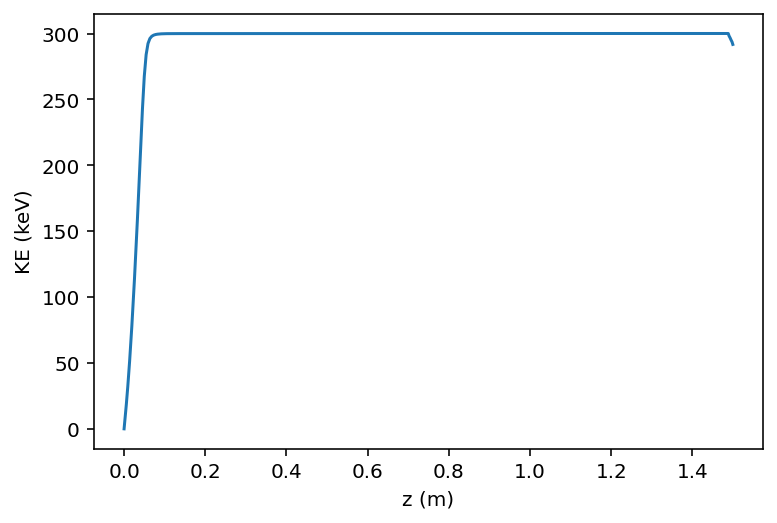

In [15]:
plt.plot(G.tout_stat("mean_z"), G.tout_stat("mean_kinetic_energy") / 1e3)
plt.xlabel("z (m)")
plt.ylabel("KE (keV)");

## Evaluate w/distgen function

In [16]:
from gpt.gpt_distgen import evaluate_gpt_with_distgen

In [17]:
res = evaluate_gpt_with_distgen(
    settings={"n_particle": 200, "Ntout": 500},
    gpt_input_file="cbeta_dcgun_gpt.in",
    distgen_input_file="cbeta_dcgun_distgen.yaml",
)

In [18]:
for k, v in res.items():
    print(f"{k}: {v}")

error: False
end_n_particle: 200
end_norm_emit_x: 2.1390740999401995e-06
end_norm_emit_y: 2.221501448819341e-06
end_higher_order_energy_spread: 238.4684708255828
end_mean_x: -1.6420606824853738e-06
end_sigma_x: 0.006000013435409549
end_min_x: -0.011227233076043258
end_max_x: 0.01111571155076658
end_mean_y: -6.33511634166492e-07
end_sigma_y: 0.005993493481229696
end_min_y: -0.011382362137028057
end_max_y: 0.010992927194492522
end_mean_z: 0.9219999999999998
end_sigma_z: 2.2739253977848196e-16
end_min_z: 0.9219999999999999
end_max_z: 0.9220000000000002
end_mean_r: 0.008084045324645885
end_sigma_r: 0.0025632673722047108
end_min_r: 0.0009774921431804702
end_max_r: 0.012173359357979776
end_mean_theta: -0.0018404541719105596
end_sigma_theta: 1.8090069847808736
end_min_theta: -3.08495210473169
end_max_theta: 3.123480431973293
end_mean_px: -1.2711137947918842
end_sigma_px: 4778.055917187375
end_min_px: -8980.047619744566
end_max_px: 8723.591814223728
end_mean_py: -0.45653546716037174
end_sigma_